<a href="https://colab.research.google.com/github/EJ-Ellie-John/NEDpython/blob/main/Class_11_12_CNN_deep_dive_(regularization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [10]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
from keras.datasets import cifar10, mnist
#from tensorflow.keras import model

# import model from keras
#from keras.models import Sequential

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000, random_state=42)

In [14]:
X_train.shape, X_val.shape, X_test.shape

((50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

In [15]:
y_train.shape, y_val.shape, y_test.shape

((50000,), (10000,), (10000,))

In [17]:
list(np.arange(0,11))

[np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)]

In [18]:
class_names = [0,1,2,3,4,5,6,7,8,9,10]

In [19]:
total_classes = len(np.unique(y_train))
total_classes

10

In [20]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
X_train.shape[1:] + (1,)

(28, 28, 1)

In [23]:
inputs = keras.layers.Input(shape=X_train.shape[1:] + (1,))
# 28, 28, 1
x= keras.layers.Conv2D(10, (5,5), activation='relu')(inputs) # filters=32, kernel_size=3, padding='same',  # 28 - 5 + 1 = 24
# 24, 24, 10 parameters = My answer 3 params (10, 5 by 5 and relu) real answer is (5x5x1+1)x10 (input, weight, bias) = 260
x= keras.layers.MaxPooling2D((2,2))(x)
# 12, 12, 10

x= keras.layers.Conv2D(20, (5,5), activation='relu')(x) # filters=32, kernel_size=3, padding='same',
# 8, 8, 20 parameters (5x5x10+1)x20 how is it 8?? d1 - k1 +1 i.e. 12 - 5 = 7 + 1 = 8 = 5,020
x= keras.layers.MaxPooling2D((2,2))(x)
# 4,4,20

x = keras.layers.Flatten()(x)
# 4x4x20 = 320 - straight line view - one column view
x=keras.layers.Dense(100,activation ='relu', name = "HL1")(x)
# (none, 100) # parameters = 320, number of neurons = 100 = 320 * neurons + neurons = 320 x 100 = 32,000 + 100 = 32,100 Input X Weights + Bias

outputs = keras.layers.Dense(total_classes, activation='softmax')(x)
# 100 x 10 + 10 = 1000 + 10 = 1010

In [27]:
Model = keras.models.Model(inputs=inputs, outputs=outputs)

Model

<Functional name=functional_3, built=True>

In [28]:
Model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 20)       │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HL1 (Dense)                     │ (None, 100)            │        32,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,390 (149.96 KB)

 Trainable params: 38,390 (149.96 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# get optimizer Adam
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

Model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])

In [32]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, monitor = 'val_loss', restore_best_weights=True)

In [34]:
history = Model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7903 - loss: 2.0717 - val_accuracy: 0.9634 - val_loss: 0.1215
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9632 - loss: 0.1234 - val_accuracy: 0.9749 - val_loss: 0.0835
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9756 - loss: 0.0851 - val_accuracy: 0.9748 - val_loss: 0.0980
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0749 - val_accuracy: 0.9779 - val_loss: 0.0944
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9816 - loss: 0.0625 - val_accuracy: 0.9778 - val_loss: 0.0826
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9757 - val_loss: 0.1080
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0550 - val_accuracy: 0.9804 - val_loss: 0.0711
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0397 -

In [36]:
loss, accuracy = Model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.3f}")
print(f"Test Loss: {loss:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0735
Test Accuracy: 0.983
Test Loss: 0.064


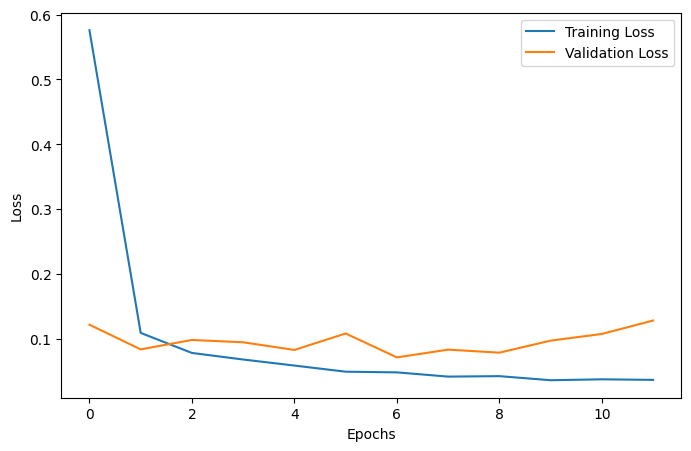

In [37]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

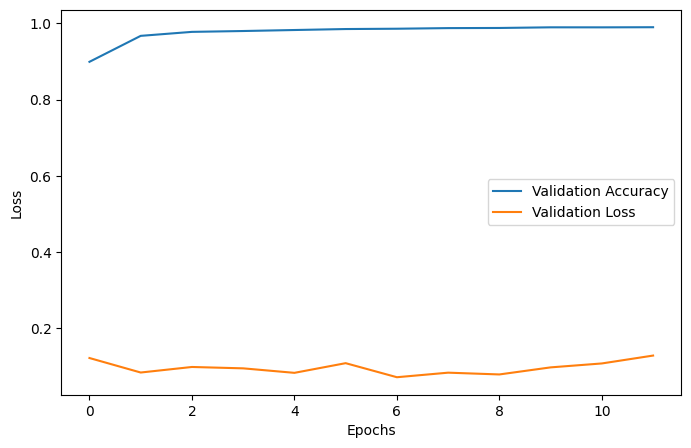

In [38]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score


In [45]:
def report(y_test, y_pred, class_names):
  y_pred = Model.predict(X_test).argmax(axis=1)
  print(classification_report(y_test,y_pred))
  conf_mat = confusion_matrix(y_test,y_pred)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
  print(f"Error: {(1-accuracy_score(y_test, y_pred))*100}%")
  disp = ConfusionMatrixDisplay(conf_mat,display_labels=class_names)
  disp.plot(cmap='Greens')
  disp.ax_.set_title("Confusion Matrix")
  plt.grid(False)
  plt.xticks(rotation=90)
  plt.show()